## __Maximum Likelihood Estimation__

---

<br>

Author:      Tyler J. Brough <br>
Last Update: February 16, 2022 <br>

<br>

This notebook is based on the following sources: 

* _Chapter 9: Point Estimation_ of _Introduction to Probability and Mathematical Statistics_ 

* _Chapter 2: General Matters_ of _Machine Learning: An Applied Mathematics Introduction_

---

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

<br>

### __Likelihood Function__

---

The joint function of $n$ random variables $X_{1}, \ldots, X_{n}$ evaluated at 
$x_{1}, \ldots, x_{n}$ the likelihood function is a function of $\theta$ and often is denoted by $L(\theta)$

<br>

If $X_{1}, \ldots, X_{n}$ represents a random sample from $f(x; \theta)$, then

<br>

$$
L(\theta) = f(x_{1}; \theta) \cdots f(x_{n}; \theta)
$$

---

<br>
<br>

### __Maximum Likelihood Estimator__

---

Let $L(\theta) = f(x_{1}, \ldots, x_{n}; \theta), \theta \in \Omega$, be the joint pdf of $X_{1}, \ldots, X_{n}$. For a given set of observations, $(x_{1}, 
\ldots, x_{n})$, a value $\hat{\theta}$ in $\Omega$ at which $L(\theta)$ is a maximum is called a __maximum likelihood estimator__ (MLE) of $\theta$. That is,
$\hat{\theta}$ is a value of $\theta$ that satisfies

<br>

$$
f(x_{1}, \ldots, x_{n}; \hat{\theta}) = \max_{\theta \in \Omega} f(x_{1}, \ldots, x_{n}; \theta)
$$

---

<br>
<br>

<br>

Notice that if each set of observations $(x_{1}, \ldots, x_{n})$ corresponds to a unique value of $\hat{\theta}$, then this procedure defines a function,
$\hat{\theta} = \mathcal{t}(x_{1}, \ldots, x_{n})$. This same function, when applied to random sample, $\hat{\theta} = \mathcal{t}(X_{1}, \ldots, X_{n})$,
is called the __maximum likelihood estimator__, also denoted MLE. Usually, the name notation, $\hat{\theta}$, is used for both the ML estimate and the ML estimator. 

<br>

In most cases, $L(\theta)$ represents the joint pdf of a random sample, although the maximum likelihood principle also applies to other cases such as sets of order statistics.

<br>

If $\Omega$ is an open interval, and if $L(\theta)$ is differentiable and assumes a maximum on $\Omega$, then the MLE will be a solution of the equation (maximum likelihood equation)

<br>

$$
{\large \frac{d}{d\theta} L(\theta) = 0}
$$

<br>

If one or more solutions to the above equation exist, then it should be verified which, if any, maximize $L(\theta)$. Note that any value of $\theta$ 
that maximizes $L(\theta$) also will maximize the log-likelihood, $\ln{[L(\theta)]}$, so for computational convenience the alternate form of the maximum
likelihood equation,

<br>

$$
{\large \frac{d}{d\theta} \ln{[L(\theta)]} = 0}
$$

<br>

often will be used.

<br>

### __Example: Coin Tossing__

<br>

Suppose you toss a coin $n$ times and get $h$ heads. What is the probability, $p$, of tossing a head next time?

<br>

The probability of getting $h$ heads from $n$ tosses is, assuming that the tosses are independent,

<br>

$$
{\large \frac{n!}{h!(n-h)!} p^{h} (1-p)^{n-h} = {n \choose h} p^{h} (1-p)^{n-h}}
$$

<br>

Applying MLE is the same as maximizing this expression with respect to $p$. This likelihood function (without the coefficient in the front that is independent of $p$) is shown below for $n = 100$ and $h = 55$. There is a very obvious maximum.

<br>

In [3]:
def likelihood(n, h, p):
    return (p**h) * ((1-p)**(n-h))

In [4]:
probs = np.linspace(start=0.01, stop=1.0, num=10_000)
l = [likelihood(100, 55, p) for p in probs]

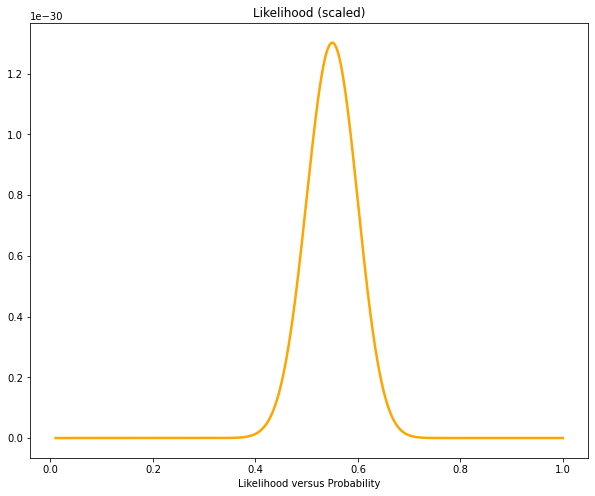

In [5]:
plt.plot(probs, l, color="orange", lw=2.5)
plt.title("Likelihood (scaled)")
plt.xlabel("Likelihood versus Probability")
plt.show()

In [6]:
probs[np.argmax(l)]

0.5499999999999999

<br>

Often with MLE when multiplying probabilities, as here, you will take the logarithm of the likelihood and maximize that. This doesn't change the maximizing value
but it does stop you from having to multiply many small numbers, which is going to be problematic with finite precision. (Look at the scale of the numbers on the
vertical axis in the figure.) Since the first part of this expression is independent of $p$ we maximize

<br>
<br>

$$
{\Large h \log{p} + (n - h) \log{(1-p)}}
$$

<br>
<br>

with respect to $p$.

In [7]:
def loglikelihood(n, h, p):
    return h * np.log(p) + (n - h) * np.log(1-p)

In [8]:
probs = np.linspace(start=0.01, stop=0.99, num=10_000)
ll = [loglikelihood(100, 55, p) for p in probs]

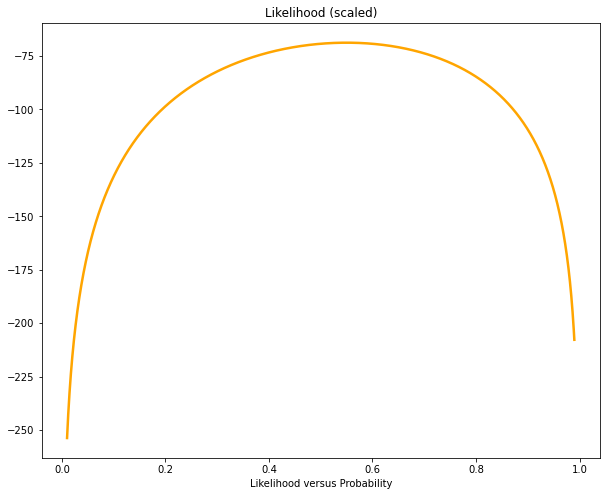

In [9]:
plt.plot(probs, ll, color="orange", lw=2.5)
plt.title("Likelihood (scaled)")
plt.xlabel("Likelihood versus Probability")
plt.show()

In [10]:
probs[np.argmax(ll)]

0.55003400340034

<br>

__The Solution__

<br>

$$
{\large
\begin{align}
\frac{d}{d \theta} \ln{[L(\theta)]} &= 0   \\
                                    &      \\
                                    &= \frac{h}{p} - \frac{(n-h)}{(1-p)} = 0 \\                 
\end{align}
}
$$

<br>

The solution is 

$$
{\large p = \frac{h}{n}}
$$

<br>

We see that this is the sample mean $\bar{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_{i}$ for the binary random variable $x$.

<br>

For the case above ($n = 100$ and $h = 55$) we see that $\hat{p} = \frac{55}{100} = 0.55$.

<br>

### __Example: A Poisson Random Variable__

<br>

Consider a random sample from a Poisson distribution, $X \sim POI(\theta)$. The likelihood function is

<br>

$$
{\large L(\theta) = \prod\limits_{i=1}^{n} f(x_{i}; \theta) = \frac{\exp({-n\theta}) \theta^{\sum_{i=1}^{n} x_{i}}}{\prod\limits_{i=1}^{n} x_{i}!}}
$$

<br>

and the log-likelihood is

<br>

$$
{\large \ln{[L(\theta)]} = -n\theta + \sum\limits_{i=1}^{n} x_{i} \ln{(\theta)} - \ln{\left(\prod\limits_{i=1}^{n} x_{i}!\right)}}
$$

<br>

The maximum likelihood equation is

<br>

$$
{\large \frac{d}{d \theta} \ln{[L(\theta)]} = -n + \sum\limits_{i=1}^{n} \frac{x_{i}}{\theta} = 0}
$$

<br>

which has the solution $\hat{\theta} = \sum\limits_{i=1}^{n} \frac{x_{i}}{n} = \bar{x}$. It is possible to verify that this is a maximum by use of the 
second derivative,

<br>

$$
{\large \frac{d^{2}}{d \theta^{2}} \ln{[L(\theta)]}= -\sum\limits_{i=1}^{n} \frac{x_{i}}{\theta^{2}} }
$$

<br>

which is negative when evaluated at $\bar{x}$, $-n/\bar{x} < 0$.

<br>

### __Example: A Normal Random Variable__

<br>

Say we have a hat full of random numbers drawn from a normal distribution but with unknown mean and standard deviation (that's two parameters). The probability
of drawing a number $x$ from this hat is

<br>

$$
{\large p(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{\left(- \frac{(x - \mu)^{2}}{2\sigma^{2}}\right)}}
$$

<br>

where $\mu$ is the mean and $\sigma$ the standard deviation which are both to be estimated. The log likelihood is then the logarithm of this, i.e.

<br>

$$
{\large \ln{(p(x))} = -\frac{1}{2} \ln{(2 \pi)} - \ln{(\sigma)} - \frac{1}{2\sigma^{2}} (x - \mu)^{2}}
$$

<br>

